<a href="https://colab.research.google.com/github/SaurabhSSB/statistics_basics/blob/main/src/outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### Data
data = [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

(array([31.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <BarContainer object of 10 artists>)

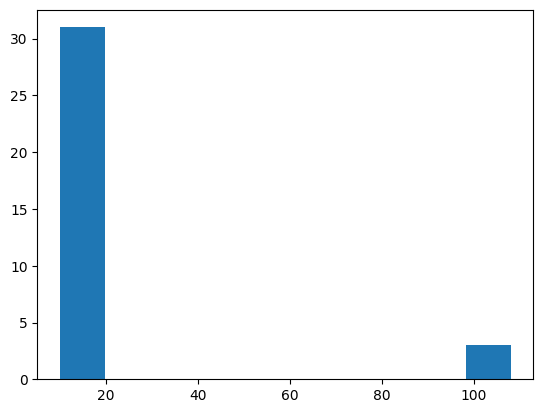

In [3]:
plt.hist(data)

In [4]:
# Z- score
outliers= []
def detect_outliers(data_x):
  threshold= 3 ## 3rd standard deviation
  mean=np.mean(data_x)
  sd= np.std(data_x)

  for i in data_x:
    z_score= (i-mean)/sd
    if np.abs(z_score)>threshold:
      outliers.append(i)
  return outliers

In [5]:
outliers_z= detect_outliers(data)
print("Outlier found using z-score:- \n", outliers_z)

Outlier found using z-score:- 
 [102, 107, 108]


## IQR
Step 1. Sort the data

Step 2. Calculate Q1(25%) and Q3(75%)

Step 3. IQR(Q3-q1)

Step 4. Find the lower fence q1- 1.5(IQR)

Step 5. Find the upeer fence q3+ 1.5(IQR)


In [6]:
## Sort
data= sorted(data)
data

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [7]:
q1,q3= np.percentile(data,[25,75])
print(q1,q3)

12.0 15.0


In [8]:
IQR= q3-q1
print(IQR)

3.0


In [9]:
## Finding the lower fence and upper fence
lower_fence= q1- 1.5* IQR
upper_fence= q3+ 1.5* IQR
print("lower_fence= ", lower_fence)
print("upper_fence= ", upper_fence)

lower_fence=  7.5
upper_fence=  19.5


In [10]:
outliers_iqr=[]
for i in data:
  if(i< lower_fence or i> upper_fence):
    outliers_iqr.append(i)

print("Outliers found using IQR:- \n",outliers_iqr)

Outliers found using IQR:- 
 [102, 107, 108]


In [11]:
import seaborn as sns

<Axes: >

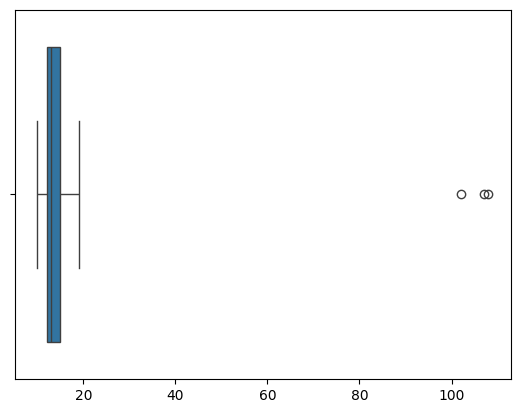

In [14]:
sns.boxplot(data,orient= "h")